In [15]:
import numpy as np
import math
from numpy.random import randint

from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ, Aer

from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import partial_trace

from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info.analysis import average_data

import matplotlib.pyplot as plt

from qiskit.providers.ibmq import least_busy
%matplotlib inline



#######imports

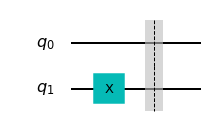

In [16]:
n = 1

oraculo_const = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    oraculo_const.x(n)
    
oraculo_const.barrier()
oraculo_const.draw(output="mpl")

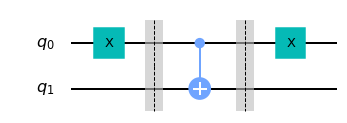

In [17]:
oraculo_bal = QuantumCircuit(n+1)
b_str = "1"  # 1 bit
  

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oraculo_bal.x(qubit)


oraculo_bal.barrier()


for qubit in range(n):
    oraculo_bal.cx(qubit, n)

oraculo_bal.barrier()


for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oraculo_bal.x(qubit)


oraculo_bal.draw(output='mpl')

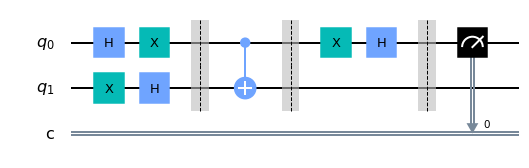

In [18]:
# primeiro o caso balanceado
dj_circuit = QuantumCircuit(n+1, n)


for qubit in range(n):
    dj_circuit.h(qubit)


dj_circuit.x(n)
dj_circuit.h(n)


dj_circuit += oraculo_bal


for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()


for i in range(n):
    dj_circuit.measure(i, i)


dj_circuit.draw(output="mpl")

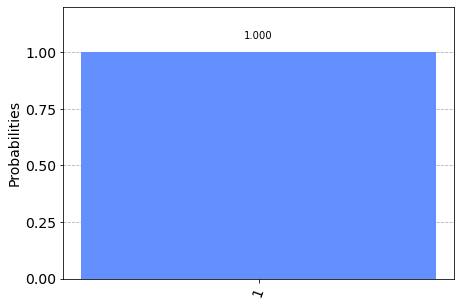

In [19]:
#caso balanceado
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend=backend, shots=1000).result()
answer = results.get_counts()
plot_histogram(answer)

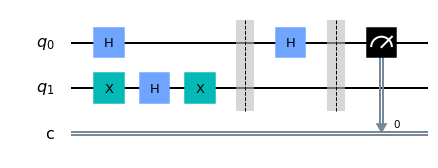

In [20]:
#caso constante
dj_circuit2 = QuantumCircuit(n+1, n)


for qubit in range(n):
    dj_circuit2.h(qubit)


dj_circuit2.x(n)
dj_circuit2.h(n)


dj_circuit2 += oraculo_const


for qubit in range(n):
    dj_circuit2.h(qubit)
dj_circuit2.barrier()

for i in range(n):
    dj_circuit2.measure(i, i)


dj_circuit2.draw(output="mpl")

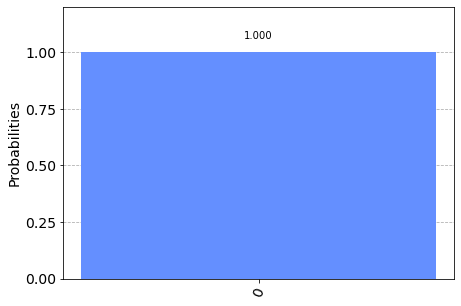

In [21]:
#caso constante
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit2, backend=backend, shots=1000).result()
answer = results.get_counts()
plot_histogram(answer)

In [22]:
############################### questao 2.2

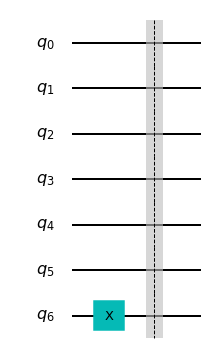

In [23]:
n = 6

oraculo_const = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    oraculo_const.x(n)
    
oraculo_const.barrier()
oraculo_const.draw(output="mpl")



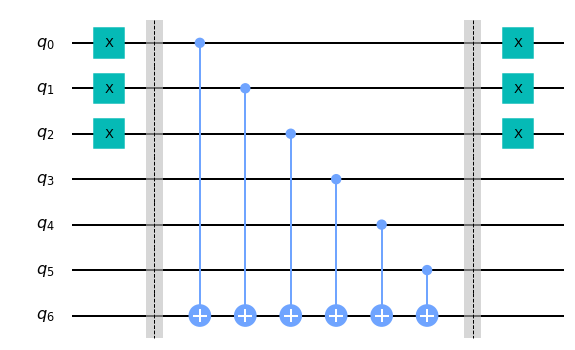

In [24]:
oraculo_bal = QuantumCircuit(n+1)
b_str = "111000"  # 6 bits
  

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oraculo_bal.x(qubit)


oraculo_bal.barrier()


for qubit in range(n):
    oraculo_bal.cx(qubit, n)

oraculo_bal.barrier()


for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oraculo_bal.x(qubit)


oraculo_bal.draw(output='mpl')

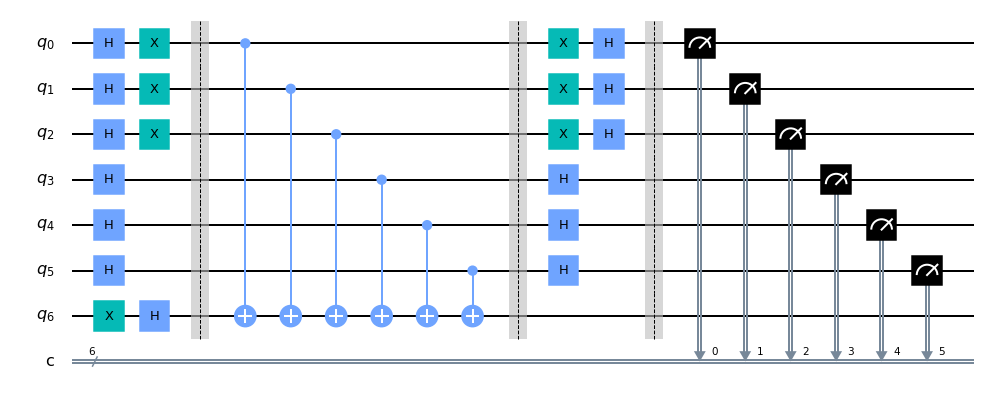

In [25]:
# primeiro o caso balanceado
dj_circuit3 = QuantumCircuit(n+1, n)


for qubit in range(n):
    dj_circuit3.h(qubit)


dj_circuit3.x(n)
dj_circuit3.h(n)


dj_circuit3 += oraculo_bal


for qubit in range(n):
    dj_circuit3.h(qubit)
dj_circuit3.barrier()


for i in range(n):
    dj_circuit3.measure(i, i)


dj_circuit3.draw(output="mpl")

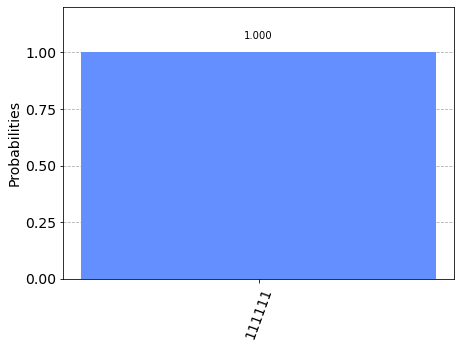

In [26]:
#caso balanceado
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit3, backend=backend, shots=1000).result()
answer = results.get_counts()
plot_histogram(answer)

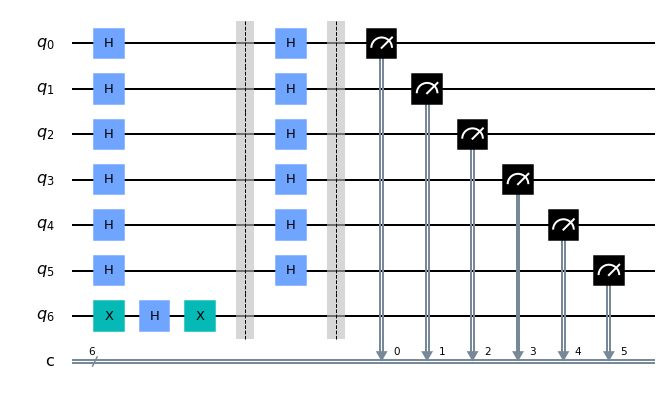

In [27]:
#caso constante
dj_circuit4 = QuantumCircuit(n+1, n)


for qubit in range(n):
    dj_circuit4.h(qubit)


dj_circuit4.x(n)
dj_circuit4.h(n)


dj_circuit4 += oraculo_const


for qubit in range(n):
    dj_circuit4.h(qubit)
dj_circuit4.barrier()

for i in range(n):
    dj_circuit4.measure(i, i)


dj_circuit4.draw(output="mpl")

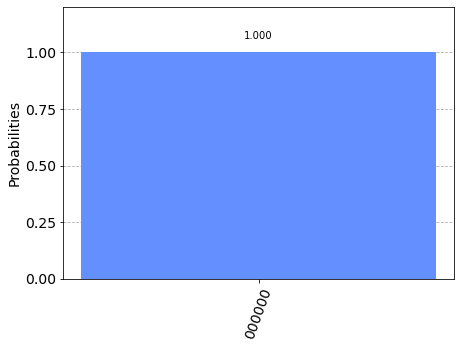

In [28]:
#caso constante
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit4, backend=backend, shots=1000).result()
answer = results.get_counts()
plot_histogram(answer)